In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from yellowbrick.classifier import ROCAUC

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import  SVC

from sklearn.metrics import mean_squared_error, accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, f1_score, classification_report, roc_curve

import lightgbm as lgb

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np

from tqdm import tqdm
review = pd.read_csv('reviews.csv')

review.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...
1,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...
2,44077,234215,2011-04-21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...
3,44077,261843,2011-05-13,490005,Weston,"No surprises, was as described. Very gracious..."
4,44077,268148,2011-05-17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli..."
5,44077,299669,2011-06-06,278797,Katelyn,Me and my friend stayed with Tereas and her fa...
6,44077,309246,2011-06-12,463261,Linda,Wonderful stay at Holly Cottage. Very helpful...
7,44077,318849,2011-06-17,533656,Mary,We had a wonderful stay at this cozy comfortab...
8,44077,325221,2011-06-20,648732,Lori,My husband and I stated with Teresa and her fa...
9,44077,339665,2011-06-28,491546,Ofra,We stayed for 4 nights and enjoyed every minut...


In [ ]:
reviews = review

In [ ]:
reviews = reviews.dropna()

In [ ]:
reviews.drop(['date', 'date', 'reviewer_name', 'reviewer_id', 'id'], axis = 1)

,listing_id,comments
0,44077,We enjoyed our stay very much. The room was co...
1,44077,We have been here 4 nights. Stay in a home is ...
2,44077,Teresa and Hughie were great hosts. They were ...
3,44077,"No surprises, was as described. Very gracious..."
4,44077,"Teresa was a lovely hostess, and we had a deli..."
...,...,...
243178,706148275480196839,"Ottima posizione, gentilezza e cortesia!"
243179,706287276585342998,Jenny was able to get us in last minute and ex...
243180,706495821581154410,Very spacious; owners communicative. Only issu...
243181,707685389742134998,What a great host couple and great spot. Super...


In [ ]:
stop_words = set(stopwords.words('english'))
def clean(review):
    word = BeautifulSoup(review).get_text()
    word = re.sub('[^a-zA-Z]', ' ', word)
    word = word.lower()
    words = word.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

all_reviews = []
for review in tqdm(reviews['comments']):
    all_reviews.append(clean(review))

  0%|          | 0/243165 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:270: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
 20%|█▉        | 48475/243165 [00:15<01:09, 2806.53it/s]/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:270: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
 89%|████████▉ | 216433/243165 [01:05<00:07, 3571.23it/s]/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:270: UserWarning: "b'/'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|██████████| 243165/243165 [01:13<00:00, 3317.41it/s]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
tfidfvectorizer = TfidfVectorizer(analyzer='word', max_df= 0.50, min_df=0.05)
reviews_tfidf = tfidfvectorizer.fit_transform(all_reviews)
reviews_tfidf = reviews_tfidf.toarray()

In [ ]:
len(tfidfvectorizer.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


66

In [ ]:
vectorizer = CountVectorizer(analyzer='word', max_df= 0.50, min_df=0.05)
reviews_vect = vectorizer.fit_transform(all_reviews)


In [ ]:
s_w = reviews_vect.sum(axis=0)
w_f = [(w, s_w[0, idx]) for w, idx in vectorizer.vocabulary_.items()]
w_f = sorted(w_f, key = lambda x: x[1], reverse = True)

''' creating dataframe '''
freq = pd.DataFrame(w_f, columns=['word', 'freq'])

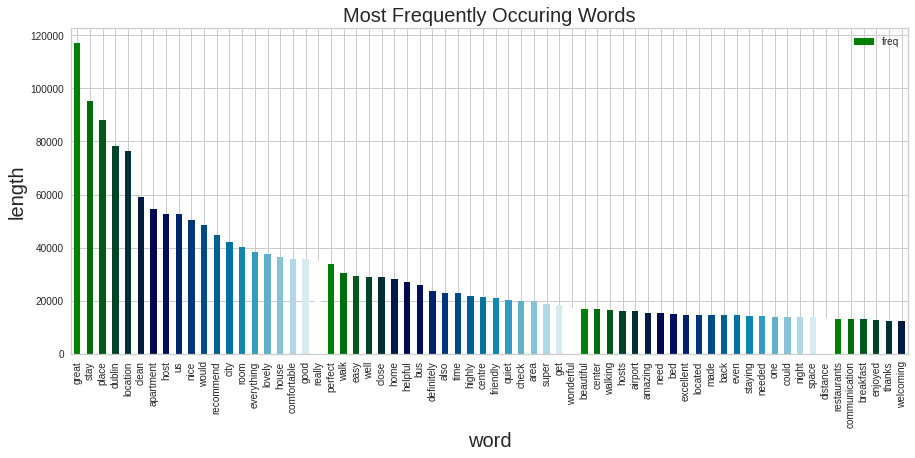

In [ ]:
color = plt.cm.ocean(np.linspace(0, 1, 20))
freq.plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words", fontsize=20)
plt.xlabel('word', fontsize=20)
plt.ylabel('length', fontsize=20);

In [ ]:

reviews_tfidf = pd.DataFrame(data=reviews_tfidf)
reviews_tfidf

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,listing_id
listing_id,,,,,,,,,,,,,,,,,,,,,
4.407700e+04,0.006479,0.029480,0.021744,0.001744,0.030780,0.026404,0.022873,0.018965,0.038012,0.065658,...,0.024182,0.041541,0.110166,0.017045,0.009114,0.061785,0.029778,0.060557,0.059693,4.407700e+04
8.515600e+04,0.006354,0.042399,0.023077,0.000000,0.028345,0.029736,0.029914,0.032928,0.066509,0.066933,...,0.019883,0.042187,0.076306,0.020086,0.014971,0.043893,0.025876,0.051702,0.046764,8.515600e+04
1.598890e+05,0.088040,0.020378,0.017712,0.000577,0.016199,0.024024,0.007823,0.035319,0.034070,0.113180,...,0.026096,0.035556,0.003944,0.014985,0.006500,0.035686,0.019843,0.030271,0.038913,1.598890e+05
1.628090e+05,0.005878,0.025881,0.027119,0.009730,0.026962,0.023131,0.013724,0.015782,0.054279,0.070309,...,0.028768,0.040275,0.103533,0.008982,0.000797,0.035943,0.034142,0.022245,0.039080,1.628090e+05
1.658280e+05,0.022353,0.043320,0.015187,0.157527,0.048869,0.010770,0.019023,0.028651,0.002606,0.102671,...,0.005947,0.032697,0.039562,0.039535,0.007622,0.008871,0.091853,0.038193,0.071835,1.658280e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.036042e+17,0.000000,0.000000,0.072554,0.000000,0.000000,0.071819,0.000000,0.071609,0.000000,0.130310,...,0.000000,0.000000,0.054250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.036042e+17
7.041359e+17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.477732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.041359e+17
7.086799e+17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.086799e+17


In [ ]:
reviews_tfidf['listing_id'] = reviews['listing_id']
cols = reviews_tfidf.columns
reviews_tfidf = reviews_tfidf.groupby('listing_id')[cols].mean()


In [ ]:
reviews_tfidf.to_csv('reviews_tfidf.csv', index=False)

In [ ]:
listings = pd.read_csv('listings.csv')
review_tfidf = pd.read_csv('reviews_tfidf.csv')
listing = listings
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48


In [ ]:
review_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,listing_id
0,0.006479,0.029480,0.021744,0.001744,0.030780,0.026404,0.022873,0.018965,0.038012,0.065658,...,0.024182,0.041541,0.110166,0.017045,0.009114,0.061785,0.029778,0.060557,0.059693,44077.0
1,0.006354,0.042399,0.023077,0.000000,0.028345,0.029736,0.029914,0.032928,0.066509,0.066933,...,0.019883,0.042187,0.076306,0.020086,0.014971,0.043893,0.025876,0.051702,0.046764,85156.0
2,0.088040,0.020378,0.017712,0.000577,0.016199,0.024024,0.007823,0.035319,0.034070,0.113180,...,0.026096,0.035556,0.003944,0.014985,0.006500,0.035686,0.019843,0.030271,0.038913,159889.0
3,0.005878,0.025881,0.027119,0.009730,0.026962,0.023131,0.013724,0.015782,0.054279,0.070309,...,0.028768,0.040275,0.103533,0.008982,0.000797,0.035943,0.034142,0.022245,0.039080,162809.0
4,0.022353,0.043320,0.015187,0.157527,0.048869,0.010770,0.019023,0.028651,0.002606,0.102671,...,0.005947,0.032697,0.039562,0.039535,0.007622,0.008871,0.091853,0.038193,0.071835,165828.0


In [ ]:
listing.rename(columns = {'id':'listing_id'}, inplace = True)
listing.head()

,listing_id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48


In [ ]:
listing_review = listing.merge(review_tfidf, on='listing_id', how='left')

In [ ]:
listing_review.head()

,listing_id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,56,57,58,59,60,61,62,63,64,65
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,0.019504,0.024182,0.041541,0.110166,0.017045,0.009114,0.061785,0.029778,0.060557,0.059693
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,0.036209,0.019883,0.042187,0.076306,0.020086,0.014971,0.043893,0.025876,0.051702,0.046764
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,0.017825,0.026096,0.035556,0.003944,0.014985,0.006500,0.035686,0.019843,0.030271,0.038913
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,0.032268,0.028768,0.040275,0.103533,0.008982,0.000797,0.035943,0.034142,0.022245,0.039080
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,0.026976,0.005947,0.032697,0.039562,0.039535,0.007622,0.008871,0.091853,0.038193,0.071835


In [ ]:
list(listing_review.columns)


['listing_id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availab

In [ ]:
listing_review = listing_review.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 
                     'name', 'description', 'neighborhood_overview', 'picture_url', 
                     'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 
                     'host_about', 'host_response_time', 'host_thumbnail_url', 'host_picture_url',
                     'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed',
                     'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 
                     'bathrooms', 'bathrooms_text', 'amenities', 'calendar_updated', 'calendar_last_scraped', 
                     'first_review', 'last_review', 'host_response_rate','license'], axis = 1)

In [ ]:
listing_review.drop_duplicates('listing_id', inplace=True)

In [ ]:
listing_review['listing_id'].nunique()

7566

In [ ]:
df = pd.DataFrame(listing_review.isna().sum())
df

,0
listing_id,0
host_acceptance_rate,3375
host_is_superhost,0
host_listings_count,0
host_total_listings_count,0
...,...
61,2378
62,2378
63,2378
64,2378


In [ ]:
listing_review.describe(include = 'O').T

,count,unique,top,freq
host_acceptance_rate,4191,95,100%,1282
host_is_superhost,7566,2,f,6589
host_has_profile_pic,7566,2,t,7445
host_identity_verified,7566,2,t,5629
price,7566,547,$100.00,235
has_availability,7566,2,t,7537
instant_bookable,7566,2,f,4778


In [ ]:
listing_review.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,7566.0,1.265543e+17,2.581749e+17,44077.0,1.742072e+07,2.798028e+07,5.034204e+07,7.130342e+17
host_listings_count,7566.0,2.457560e+01,2.026234e+02,1.0,1.000000e+00,1.000000e+00,3.000000e+00,2.157000e+03
host_total_listings_count,7566.0,3.983796e+01,3.404581e+02,1.0,1.000000e+00,2.000000e+00,4.000000e+00,1.201700e+04
accommodates,7566.0,3.006080e+00,1.888488e+00,1.0,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,7361.0,1.523978e+00,9.190036e-01,1.0,1.000000e+00,1.000000e+00,2.000000e+00,1.300000e+01
...,...,...,...,...,...,...,...,...
61,5188.0,2.051022e-02,3.984253e-02,0.0,0.000000e+00,9.145418e-03,2.733299e-02,4.753812e-01
62,5188.0,1.840362e-02,4.214014e-02,0.0,0.000000e+00,0.000000e+00,2.332208e-02,8.527081e-01
63,5188.0,3.397780e-02,4.840354e-02,0.0,0.000000e+00,2.513210e-02,4.557514e-02,6.376057e-01
64,5188.0,2.085384e-02,4.045673e-02,0.0,0.000000e+00,7.889151e-03,2.852804e-02,7.713176e-01


In [ ]:
def missing_valu(df):
    msng_vals = df.isnull().sum().sort_values(ascending = False)
    return msng_vals

pd.DataFrame(missing_valu(listing))

,0
neighbourhood_group_cleansed,7566
license,7566
calendar_updated,7566
bathrooms,7566
host_about,4010
...,...
maximum_minimum_nights,0
minimum_maximum_nights,0
maximum_maximum_nights,0
minimum_nights_avg_ntm,0


In [ ]:
listing = listing_review
listing['beds'] = listing['beds'].fillna(listing['beds'].median())
listing['bedrooms'] = listing['bedrooms'].fillna(listing['bedrooms'].median())
listing['review_scores_rating'] = listing['review_scores_rating'].fillna(listing['review_scores_rating'].median())
listing['reviews_per_month'] = listing['reviews_per_month'].fillna(listing['reviews_per_month'].median())
listing['review_scores_cleanliness'] = listing['review_scores_cleanliness'].fillna(listing['review_scores_cleanliness'].median())
listing['review_scores_communication'] = listing['review_scores_communication'].fillna(listing['review_scores_communication'].median())
listing['review_scores_accuracy'] = listing['review_scores_accuracy'].fillna(listing['review_scores_accuracy'].median())
listing['review_scores_location'] = listing['review_scores_location'].fillna(listing['review_scores_location'].median())
listing['review_scores_checkin'] = listing['review_scores_checkin'].fillna(listing['review_scores_checkin'].median())
listing['review_scores_value'] = listing['review_scores_value'].fillna(listing['review_scores_value'].median())


In [ ]:
def cleaning_(price):
    if len(price) == 0:
        return 0.0
    if len(price)>0:
        if ',' in price:
            price = price.replace(',', '')
        if price[0] != '$':
            return float(price)
        else:
            return float(price[1:])
    else:
        return 0.0
listing['price'] = listing['price'].apply(cleaning_)

In [ ]:
listing['host_acceptance_rate'] = listing['host_acceptance_rate'].str.strip('%').astype(float)
listing.host_acceptance_rate.fillna(listing.host_acceptance_rate.median(),inplace = True)

In [ ]:
listing = listing.fillna(listing.median())
pd.DataFrame(missing_valu(listing))

<ipython-input-305-dfa6c08d3cd9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  listing = listing.fillna(listing.median())


,0
listing_id,0
39,0
37,0
36,0
35,0
...,...
review_scores_location,0
review_scores_communication,0
review_scores_checkin,0
review_scores_cleanliness,0


In [ ]:
listing = listing.replace(
            {
            'host_has_profile_pic': {'t': 1, 'f': 0},
            'host_identity_verified': {'t': 1, 'f': 0},
            'instant_bookable': {'t': 1, 'f': 0},
            'host_is_superhost': {'t': 1, 'f': 0},
            'has_availability': {'t': 1, 'f': 0}
            })

In [ ]:
pd.DataFrame(listing.dtypes)

,0
listing_id,int64
host_acceptance_rate,float64
host_is_superhost,int64
host_listings_count,int64
host_total_listings_count,int64
...,...
61,float64
62,float64
63,float64
64,float64


In [ ]:
listing.shape

(7566, 106)

In [ ]:
listing.price.describe()

count     7566.000000
mean       182.327953
std       1170.750214
min         10.000000
25%         65.000000
50%        105.000000
75%        192.750000
max      99149.000000
Name: price, dtype: float64

In [ ]:
listing = listing[listing.price >= 10]
listing = listing[listing.price <= 1000]

In [ ]:
listing.to_csv('listing.csv', index=False)



> 



In [ ]:
listing = pd.read_csv('listing.csv')

In [ ]:
listing.head()


,listing_id,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,...,56,57,58,59,60,61,62,63,64,65
0,44077,99.0,1,2,2,1,1,2,1.0,2.0,...,0.019504,0.024182,0.041541,0.110166,0.017045,0.009114,0.061785,0.029778,0.060557,0.059693
1,85156,99.0,1,2,2,1,1,2,1.0,1.0,...,0.036209,0.019883,0.042187,0.076306,0.020086,0.014971,0.043893,0.025876,0.051702,0.046764
2,159889,95.0,0,3,4,1,1,1,1.0,1.0,...,0.017825,0.026096,0.035556,0.003944,0.014985,0.006500,0.035686,0.019843,0.030271,0.038913
3,162809,87.0,1,2,2,1,1,6,2.0,4.0,...,0.032268,0.028768,0.040275,0.103533,0.008982,0.000797,0.035943,0.034142,0.022245,0.039080
4,165828,91.0,0,5,5,1,1,5,1.0,3.0,...,0.026976,0.005947,0.032697,0.039562,0.039535,0.007622,0.008871,0.091853,0.038193,0.071835


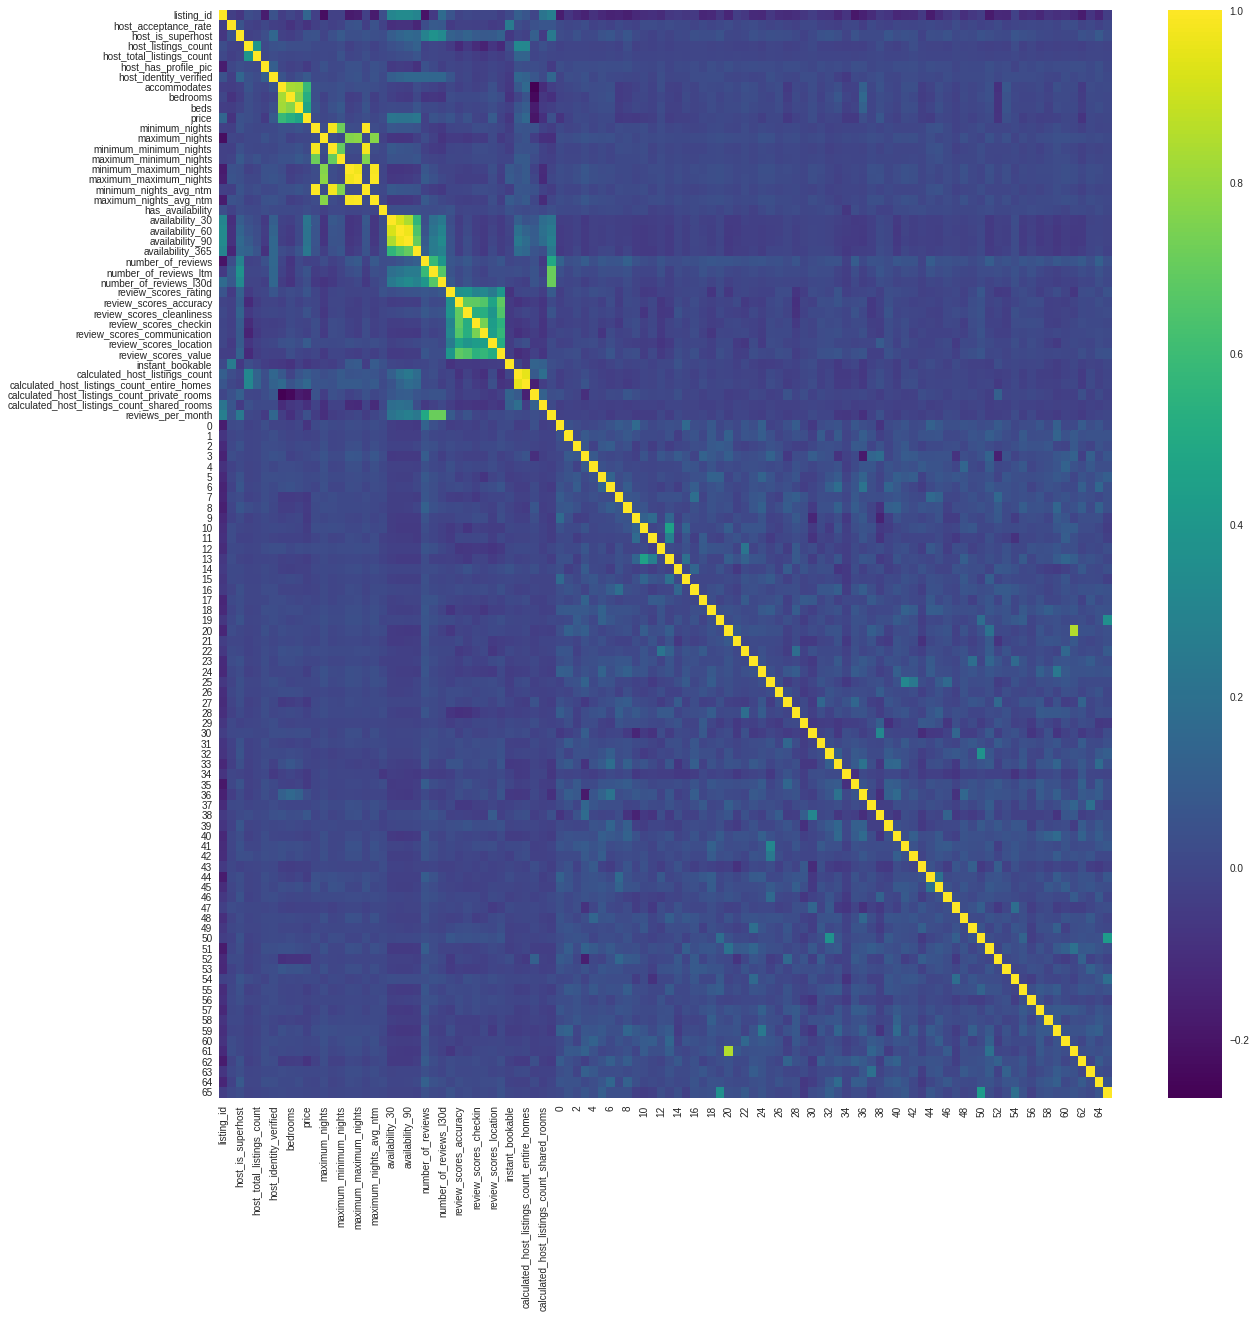

In [ ]:
fig = plt.figure(figsize= (20,20))
sns.heatmap(listing.corr(), annot=False, vmax=1, cmap='viridis', square=False)

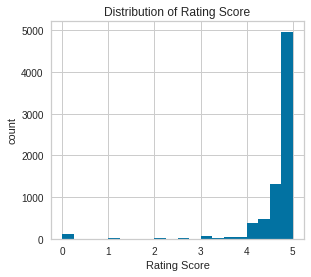

In [ ]:
fig = plt.figure(figsize = (10,4))

ax = fig.add_subplot(1,2,1)

listing.review_scores_rating.hist(ax = ax, bins = 20)
ax.set_title('Distribution of Rating Score')
ax.set_xlabel('Rating Score')
ax.set_ylabel('count')

plt.show()

In [ ]:
bins = [4.4,4.6,4.8]
listing1 = listing.assign(
    rating_bins = pd.qcut(
        listing['review_scores_rating'],
        q=3,
        duplicates='drop',
        labels=[0,1,2]
    )
)

In [ ]:
listing1['rating_bins'].value_counts()

1    2531
0    2502
2    2437
Name: rating_bins, dtype: int64

In [ ]:
listing1.head().T

,0,1,2,3,4
listing_id,44077.000000,85156.000000,159889.000000,162809.000000,165828.000000
host_acceptance_rate,99.000000,99.000000,95.000000,87.000000,91.000000
host_is_superhost,1.000000,1.000000,0.000000,1.000000,0.000000
host_listings_count,2.000000,2.000000,3.000000,2.000000,5.000000
host_total_listings_count,2.000000,2.000000,4.000000,2.000000,5.000000
...,...,...,...,...,...
62,0.061785,0.043893,0.035686,0.035943,0.008871
63,0.029778,0.025876,0.019843,0.034142,0.091853
64,0.060557,0.051702,0.030271,0.022245,0.038193
65,0.059693,0.046764,0.038913,0.039080,0.071835




```

```



In [ ]:
def grid_cv_lr(logModel, paramgrid, x_train,y_train):
  cl = GridSearchCV(logModel, param_grid = paramgrid, scoring='accuracy', cv = 5, verbose=True, n_jobs=-1)

  best_clf = cl.fit(x_train,y_train)
  print(cl.fit(x_train,y_train))
  print(best_clf.best_estimator_)
  print(best_clf.best_score_)

In [ ]:
def plot_imp_fea(model):
  fig = plt.figure(figsize=(18,9))

  fea_imp = abs(model.coef_[0])
  fea_imp = 100.0 * (fea_imp / fea_imp.max())
  idx = np.argsort(fea_imp)[0:15]
  pos = np.arange(idx.shape[0]) + .6
  idx_list = list(idx)
  ax = fig.add_subplot(1, 3, 1)
  ax.barh(pos, fea_imp[idx], align='center')
  ax.set_yticks(pos)
  ax.set_yticklabels(x_train.columns[idx], fontsize=8)
  ax.set_xlabel('Relative Feature Importance')
  ax.set_title('Class = 0 (Tier 3 rating)')

  fea_imp = abs(model.coef_[1])
  fea_imp = 100.0 * (fea_imp / fea_imp.max())
  idx = np.argsort(fea_imp)[0:15]
  pos = np.arange(idx.shape[0]) + .6
  idx_list = list(idx)
  ax = fig.add_subplot(1, 3, 2)
  ax.barh(pos, fea_imp[idx], align='center')
  ax.set_yticks(pos)
  ax.set_yticklabels(x_train.columns[idx], fontsize=8)
  ax.set_xlabel('Relative Feature Importance')
  ax.set_title('Class = 1 (Tier 2 rating)')

  fea_imp = abs(model.coef_[2])
  fea_imp = 100.0 * (fea_imp / fea_imp.max())
  idx = np.argsort(fea_imp)[0:15]
  pos = np.arange(idx.shape[0]) + .6
  idx_list = list(idx)
  ax = fig.add_subplot(1, 3, 3)
  ax.barh(pos, fea_imp[idx], align='center')
  ax.set_yticks(pos)
  ax.set_yticklabels(x_train.columns[idx], fontsize=8)
  ax.set_xlabel('Relative Feature Importance')
  ax.set_title('Class = 3 (Tier 1 rating)')

  plt.tight_layout()   
  plt.show()

In [ ]:
def report(model, x_test, y_test):
  y_predict = model.predict(x_test)
  print("Score: %.3f" % model.score(x_test,y_test))
  print('Precision: %0.2f \nRecall: %0.2f \nF1 Score: %0.2f' %
      (precision_score(y_test, y_predict, average='weighted'),
       recall_score(y_test, y_predict, average='weighted'),
       f1_score(y_test, y_predict, average='weighted'))
      )

  print("")


  print("Classification Report")

  print(classification_report(y_test, y_predict))
  print("")


  matrix = pd.DataFrame(data=confusion_matrix(y_test, y_predict), 
                           columns=['P_Class_0', 'P_Class_1', 'P_Class_2'],
                           index=['Class_0', 'Class_1', 'Class_2'])
  print("Confusion Matrix")
  print(matrix)

In [ ]:
def plot_ROC_curve(model, x_train, y_train, x_test, y_test):

    visualizer = ROCAUC(model, encoder={0: '4.4', 
                                        1: '4.6', 
                                        2: '4.8'})
                             
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    
    return visualizer

In [ ]:
columns = ['host_acceptance_rate', 'host_is_superhost','host_listings_count','host_has_profile_pic',
           'host_identity_verified','accommodates','bedrooms','beds','price','minimum_nights','maximum_nights',
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','number_of_reviews',
           'instant_bookable', '0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
           '16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33',
           '34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51',
           '52','53','54','55','56','57','58','59','60','61','62','63','64','65']
target = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
          'review_scores_communication','review_scores_location','review_scores_value']

In [ ]:
x = listing1.loc[:,columns]
y = listing1['rating_bins']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [ ]:
paramgrid = [
          {'penalty' : ['l2'],
           'C' : [0.1, 1, 5, 10, 50],
           'solver' : ['lbfgs','newton-cg'],
           'multi_class' : ['multinomial']
           }]
grid_cv_lr(LogisticRegression(), paramgrid, x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 5, 10, 50],
                          'multi_class': ['multinomial'], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg']}],
             scoring='accuracy', verbose=True)
LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg')
0.5164196508219702


In [ ]:
model = LogisticRegression(penalty = 'l2', C=1, random_state=0, solver='newton-cg',multi_class='multinomial')
model.fit(x_train, y_train)


LogisticRegression(C=1, multi_class='multinomial', random_state=0,
                   solver='newton-cg')

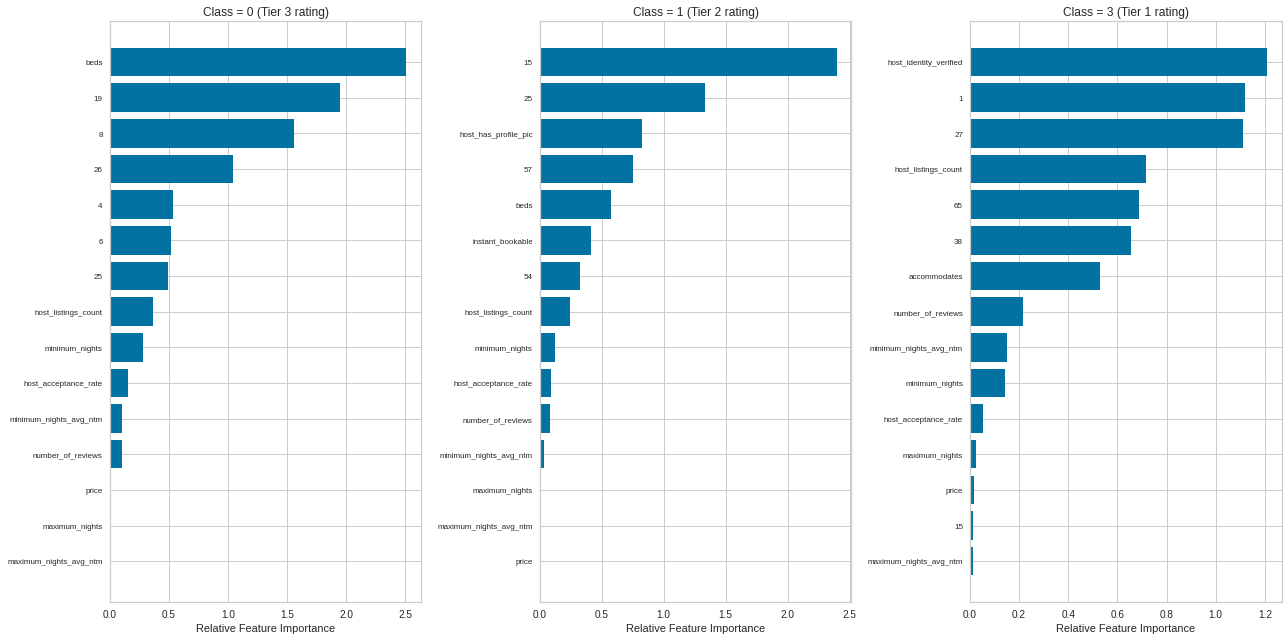

Score: 0.553
Precision: 0.55 
Recall: 0.55 
F1 Score: 0.55

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       626
           1       0.55      0.58      0.56       629
           2       0.53      0.46      0.50       613

    accuracy                           0.55      1868
   macro avg       0.55      0.55      0.55      1868
weighted avg       0.55      0.55      0.55      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        387        123        116
Class_1        135        362        132
Class_2        158        171        284


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


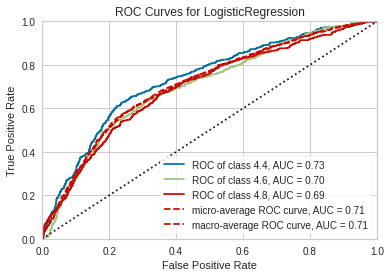

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca37945cd0>,
       encoder={0: '4.4', 1: '4.6', 2: '4.8'},
       estimator=LogisticRegression(C=1, multi_class='multinomial',
                                    random_state=0, solver='newton-cg'))

In [ ]:
plot_imp_fea(model)
report(model, x_test, y_test)
plot_ROC_curve(model, x_train, y_train, x_test, y_test)

LGBM-C

In [ ]:
def report_lgbm(lgbm, x_test, y_test):
   print('feature importances')
   ax = lgb.plot_importance(lgbm, max_num_features=12)
   plt.show()
   
   y_pred_prob = lgbm.predict(x_test, num_iteration=lgbm.best_iteration)
   y_predict = []
   for x in y_pred_prob:
      y_predict.append(np.argmax(x))

  
   print("LGBM - results ")
   print('Precision: %0.2f \nRecall: %0.2f \nF1 Score: %0.2f' %
      (precision_score(y_test, y_predict, average='weighted'),
       recall_score(y_test, y_predict, average='weighted'),
       f1_score(y_test, y_predict, average='weighted'))
     )

   print("")


   print("Classification Report")

   print(classification_report(y_test, y_predict))
   print("")

   matrix = pd.DataFrame(data=confusion_matrix(y_test, y_predict), 
                           columns=['P_Class_0', 'P_Class_1', 'P_Class_2'],
                           index=['Class_0', 'Class_1', 'Class_2'])
   print("Confusion Matrix")
   print(matrix)
   
   print('ROC Curve')
   plot_roc(y_test, y_predict,'LGBM')

In [ ]:
def plot_roc(y_test,y_predict,modelname):
    
    nclass=3
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(nclass):
        fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_predict))[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nclass)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(nclass):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= nclass
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    lw=2
    plt.figure(figsize=(8,8))
    plt.plot(fpr["macro"], tpr["macro"],
    label='macro-average ROC curve (area = {0:0.2f})'
          ''.format(roc_auc["macro"]),
    color='green', linestyle=':', linewidth=4)
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(nclass), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(str('Receiver Operating Characteristics for '+modelname))
    plt.legend()
    plt.show()

[1]	valid_0's multi_logloss: 1.0824
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 1.07232
[3]	valid_0's multi_logloss: 1.05943
[4]	valid_0's multi_logloss: 1.05017
[5]	valid_0's multi_logloss: 1.03861
[6]	valid_0's multi_logloss: 1.02742
[7]	valid_0's multi_logloss: 1.01524
[8]	valid_0's multi_logloss: 1.00651
[9]	valid_0's multi_logloss: 0.998746
[10]	valid_0's multi_logloss: 0.990493
[11]	valid_0's multi_logloss: 0.980848
[12]	valid_0's multi_logloss: 0.97326
[13]	valid_0's multi_logloss: 0.963416
[14]	valid_0's multi_logloss: 0.954604
[15]	valid_0's multi_logloss: 0.947055
[16]	valid_0's multi_logloss: 0.941749
[17]	valid_0's multi_logloss: 0.935676
[18]	valid_0's multi_logloss: 0.924752
[19]	valid_0's multi_logloss: 0.914379
[20]	valid_0's multi_logloss: 0.90714
[21]	valid_0's multi_logloss: 0.903782
[22]	valid_0's multi_logloss: 0.897002
[23]	valid_0's multi_logloss: 0.891603
[24]	valid_0's multi_logloss: 0.885849
[25]	valid_0's multi_lo

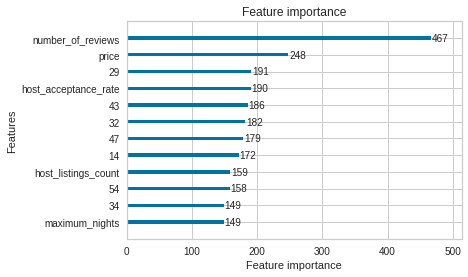

LGBM - results 
Precision: 0.69 
Recall: 0.67 
F1 Score: 0.67

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       626
           1       0.86      0.64      0.73       629
           2       0.59      0.70      0.64       613

    accuracy                           0.67      1868
   macro avg       0.69      0.67      0.67      1868
weighted avg       0.69      0.67      0.67      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        417         29        180
Class_1        114        404        111
Class_2        147         39        427
ROC Curve


<ipython-input-329-2dd0373765a5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


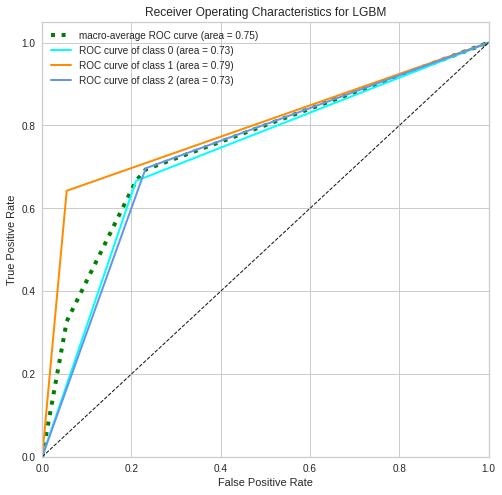

In [ ]:
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':3,
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'max_depth': 7,
    'num_leaves': 17,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.6,
    'bagging_freq': 17
         }
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
evals_result = {}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=5,
               evals_result=evals_result,
               feature_name=columns)


LGBM feature importances:


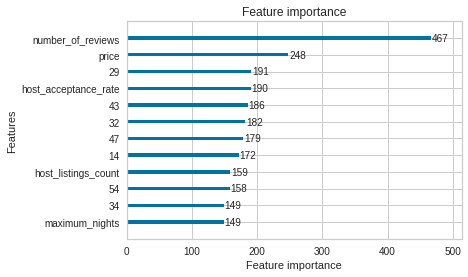

LGBM - results 
Precision: 0.69 
Recall: 0.67 
F1 Score: 0.67

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       626
           1       0.86      0.64      0.73       629
           2       0.59      0.70      0.64       613

    accuracy                           0.67      1868
   macro avg       0.69      0.67      0.67      1868
weighted avg       0.69      0.67      0.67      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        417         29        180
Class_1        114        404        111
Class_2        147         39        427
ROC Curve


<ipython-input-329-2dd0373765a5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


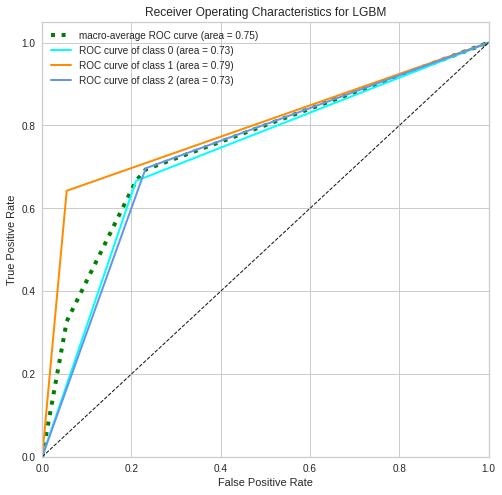

In [ ]:
report_lgbm(gbm, x_test, y_test)

Random Forest


In [ ]:
rnd_for = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=30, 
    min_samples_split=10, 
    class_weight="balanced"
    )

rnd_for.fit(x_train, y_train)
print('Feature importances from Random Forest')
imp = rnd_for.feature_importances_
feat = columns


Feature importances from Random Forest


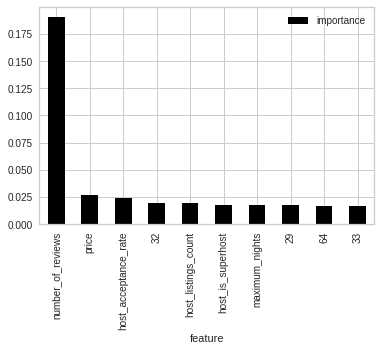

Logistic Regression -  results
Score: 0.646
Precision: 0.68 
Recall: 0.65 
F1 Score: 0.65

Classification Report
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       626
           1       0.89      0.59      0.71       629
           2       0.58      0.69      0.63       613

    accuracy                           0.65      1868
   macro avg       0.68      0.65      0.65      1868
weighted avg       0.68      0.65      0.65      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        414         18        194
Class_1        141        372        116
Class_2        164         28        421


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


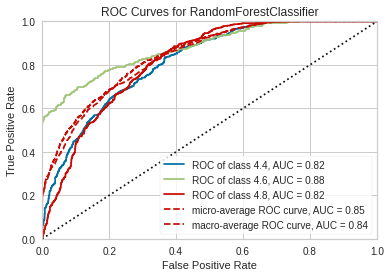

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca38b98b50>,
       encoder={0: '4.4', 1: '4.6', 2: '4.8'},
       estimator=RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_split=10,
                                        n_estimators=1000))

In [ ]:
tree_result = pd.DataFrame({'feature': feat, 'importance': imp})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',color='black')
plt.show()
report(rnd_for, x_test, y_test)
plot_ROC_curve(rnd_for, x_train, y_train, x_test, y_test)

ACCURACY SCORE

In [ ]:
bins = [4.4,4.6,4.8]
listing1 = listing.assign(
    rating_bins = pd.qcut(
        listing['review_scores_accuracy'],
        q=3,
        duplicates='drop',
        labels=[0,1,2]
    )
)
listing1['rating_bins'].value_counts()


0    2591
1    2471
2    2408
Name: rating_bins, dtype: int64

In [ ]:
columns = ['host_acceptance_rate', 'host_is_superhost','host_listings_count','host_has_profile_pic',
           'host_identity_verified','accommodates','bedrooms','beds','price','minimum_nights','maximum_nights',
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','number_of_reviews',
           'instant_bookable', '0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
           '16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33',
           '34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51',
           '52','53','54','55','56','57','58','59','60','61','62','63','64','65']

target = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
          'review_scores_communication','review_scores_location','review_scores_value']

#For accuracy

x = listing1.loc[:,columns]
y = listing1['rating_bins']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [ ]:
grid_cv_lr(LogisticRegression(), paramgrid, x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 5, 10, 50],
                          'multi_class': ['multinomial'], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg']}],
             scoring='accuracy', verbose=True)
LogisticRegression(C=5, multi_class='multinomial', solver='newton-cg')
0.5039282528354785


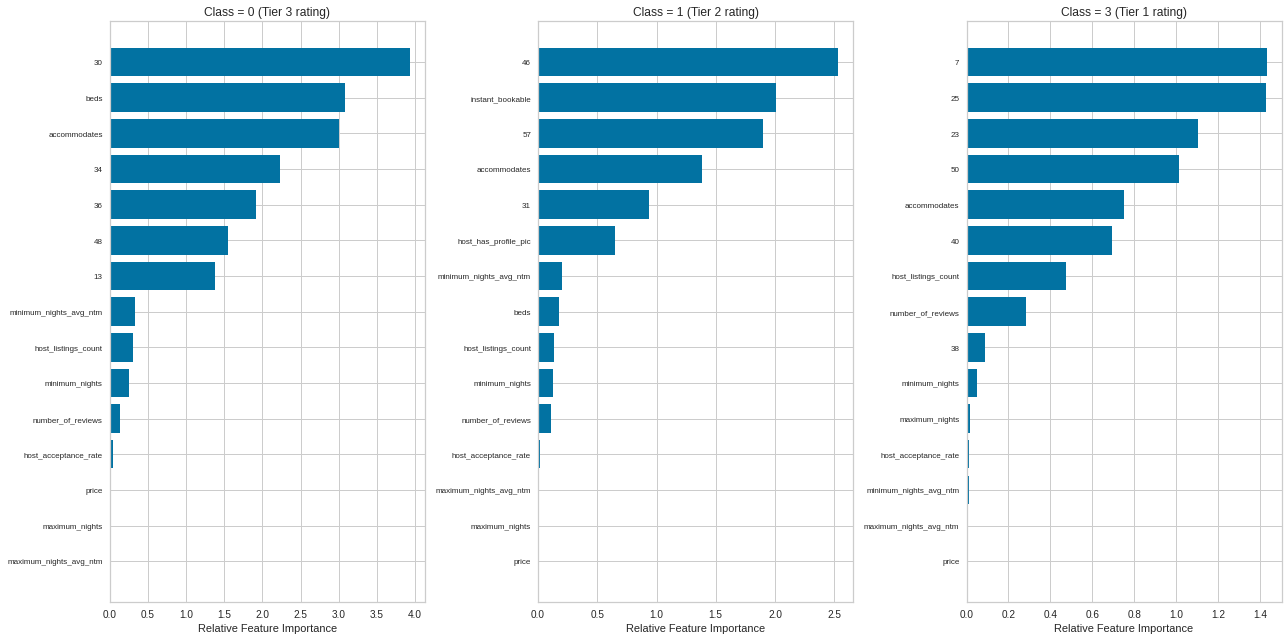

Logistic Regression -  results
Score: 0.520
Precision: 0.52 
Recall: 0.52 
F1 Score: 0.52

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       652
           1       0.52      0.62      0.57       611
           2       0.49      0.41      0.44       605

    accuracy                           0.52      1868
   macro avg       0.52      0.52      0.52      1868
weighted avg       0.52      0.52      0.52      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        346        145        161
Class_1        132        378        101
Class_2        156        202        247


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


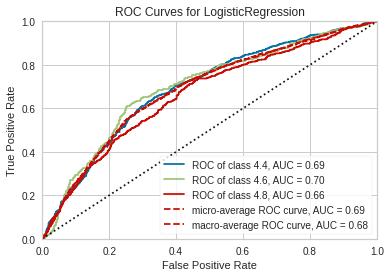

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca38ca5340>,
       encoder={0: '4.4', 1: '4.6', 2: '4.8'},
       estimator=LogisticRegression(C=5, multi_class='multinomial',
                                    random_state=0, solver='newton-cg'))

In [ ]:
model = LogisticRegression(penalty = 'l2', C=5, random_state=0, solver='newton-cg',multi_class='multinomial')
model.fit(x_train, y_train)

plot_imp_fea(model)
report(model, x_test, y_test)
plot_ROC_curve(model, x_train, y_train, x_test, y_test)

In [ ]:
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':3,
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'max_depth': 7,
    'num_leaves': 17,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.6,
    'bagging_freq': 17
         }
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
evals_result = {}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=5,
               evals_result=evals_result,
               feature_name=columns)


[1]	valid_0's multi_logloss: 1.08073
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 1.06975
[3]	valid_0's multi_logloss: 1.056
[4]	valid_0's multi_logloss: 1.0467
[5]	valid_0's multi_logloss: 1.03529
[6]	valid_0's multi_logloss: 1.02395
[7]	valid_0's multi_logloss: 1.01031
[8]	valid_0's multi_logloss: 1.00248
[9]	valid_0's multi_logloss: 0.99431
[10]	valid_0's multi_logloss: 0.985875
[11]	valid_0's multi_logloss: 0.975342
[12]	valid_0's multi_logloss: 0.967604
[13]	valid_0's multi_logloss: 0.957339
[14]	valid_0's multi_logloss: 0.948139
[15]	valid_0's multi_logloss: 0.941359
[16]	valid_0's multi_logloss: 0.936055
[17]	valid_0's multi_logloss: 0.930891
[18]	valid_0's multi_logloss: 0.919479
[19]	valid_0's multi_logloss: 0.909689
[20]	valid_0's multi_logloss: 0.902599
[21]	valid_0's multi_logloss: 0.89953
[22]	valid_0's multi_logloss: 0.892511
[23]	valid_0's multi_logloss: 0.887608
[24]	valid_0's multi_logloss: 0.882224
[25]	valid_0's multi_logl


LGBM feature importances:


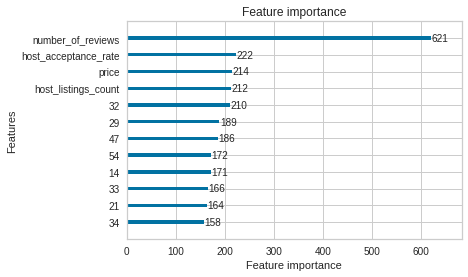

LGBM - results 
Precision: 0.67 
Recall: 0.65 
F1 Score: 0.66

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.65      0.63       652
           1       0.81      0.65      0.72       611
           2       0.59      0.65      0.62       605

    accuracy                           0.65      1868
   macro avg       0.67      0.65      0.66      1868
weighted avg       0.67      0.65      0.66      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        427         40        185
Class_1        130        398         83
Class_2        156         56        393
ROC Curve


<ipython-input-329-2dd0373765a5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


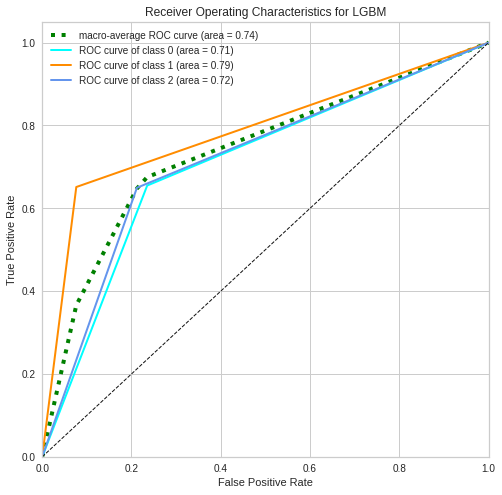

In [ ]:
report_lgbm(gbm, x_test, y_test)

In [ ]:
rnd_for = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=30, 
    min_samples_split=10, 
    class_weight="balanced"
    )

rnd_for.fit(x_train, y_train)
print('Feature importances from Random Forest')
imp = rnd_for.feature_importances_
feat = columns


Feature importances from Random Forest


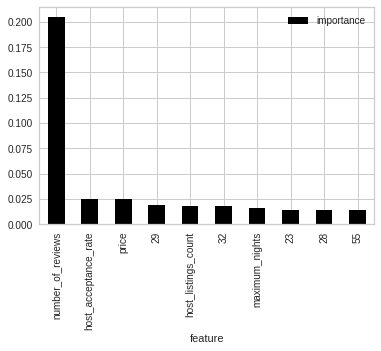

Logistic Regression -  results
Score: 0.645
Precision: 0.67 
Recall: 0.65 
F1 Score: 0.65

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.67      0.61       652
           1       0.85      0.64      0.73       611
           2       0.59      0.62      0.61       605

    accuracy                           0.65      1868
   macro avg       0.67      0.64      0.65      1868
weighted avg       0.67      0.65      0.65      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        435         24        193
Class_1        153        392         66
Class_2        184         43        378


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


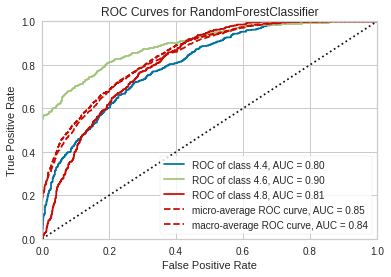

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca38446700>,
       encoder={0: '4.4', 1: '4.6', 2: '4.8'},
       estimator=RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_split=10,
                                        n_estimators=1000))

In [ ]:
tree_result = pd.DataFrame({'feature': feat, 'importance': imp})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',color='black')
plt.show()
report(rnd_for, x_test, y_test)
plot_ROC_curve(rnd_for, x_train, y_train, x_test, y_test)

CLEANLINESS

In [ ]:
bins = [4.4,4.6,4.8]
listing1 = listing.assign(
    rating_bins = pd.qcut(
        listing['review_scores_cleanliness'],
        q=3,
        duplicates='drop',
        labels=[0,1,2]
    )
)
listing1['rating_bins'].value_counts()

0    2601
2    2445
1    2424
Name: rating_bins, dtype: int64

In [ ]:
columns = ['host_acceptance_rate', 'host_is_superhost','host_listings_count','host_has_profile_pic',
           'host_identity_verified','accommodates','bedrooms','beds','price','minimum_nights','maximum_nights',
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','number_of_reviews',
           'instant_bookable', '0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
           '16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33',
           '34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51',
           '52','53','54','55','56','57','58','59','60','61','62','63','64','65']

target = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
          'review_scores_communication','review_scores_location','review_scores_value']

#For Cleanliness

x = listing1.loc[:,columns]
y = listing1['rating_bins']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [ ]:
grid_cv_lr(LogisticRegression(), paramgrid, x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 5, 10, 50],
                          'multi_class': ['multinomial'], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg']}],
             scoring='accuracy', verbose=True)
LogisticRegression(C=50, multi_class='multinomial', solver='newton-cg')
0.5133864852809991


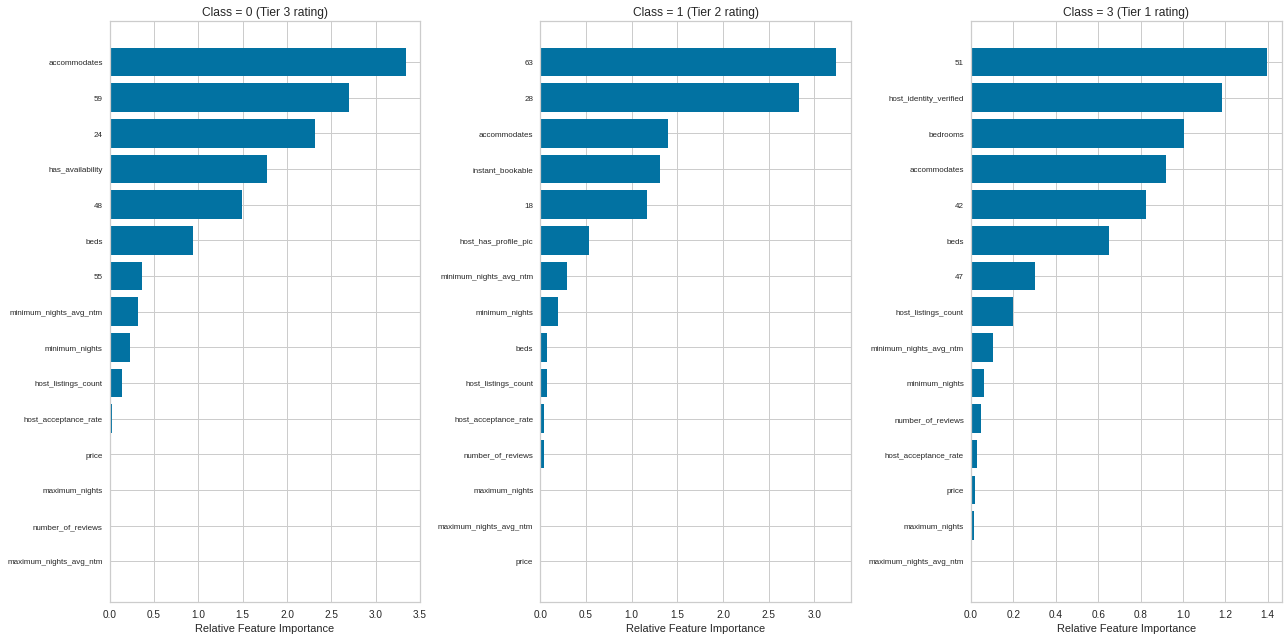

Logistic Regression -  results
Score: 0.516
Precision: 0.51 
Recall: 0.52 
F1 Score: 0.51

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       644
           1       0.52      0.61      0.57       604
           2       0.50      0.38      0.43       620

    accuracy                           0.52      1868
   macro avg       0.51      0.52      0.51      1868
weighted avg       0.51      0.52      0.51      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        359        148        137
Class_1        135        370         99
Class_2        199        187        234


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


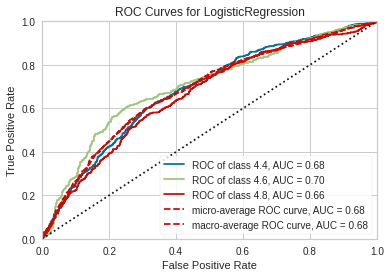

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca381741f0>,
       encoder={0: '4.4', 1: '4.6', 2: '4.8'},
       estimator=LogisticRegression(C=50, multi_class='multinomial',
                                    random_state=0, solver='newton-cg'))

In [ ]:
model = LogisticRegression(penalty = 'l2', C=50, random_state=0, solver='newton-cg',multi_class='multinomial')
model.fit(x_train, y_train)

plot_imp_fea(model)
report(model, x_test, y_test)
plot_ROC_curve(model, x_train, y_train, x_test, y_test)

In [ ]:
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':3,
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'max_depth': 7,
    'num_leaves': 17,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.6,
    'bagging_freq': 17
         }
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
evals_result = {}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=5,
               evals_result=evals_result,
               feature_name=columns)

[1]	valid_0's multi_logloss: 1.08389
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 1.07452
[3]	valid_0's multi_logloss: 1.06256
[4]	valid_0's multi_logloss: 1.05499
[5]	valid_0's multi_logloss: 1.04545
[6]	valid_0's multi_logloss: 1.03618
[7]	valid_0's multi_logloss: 1.02458
[8]	valid_0's multi_logloss: 1.01811
[9]	valid_0's multi_logloss: 1.01138
[10]	valid_0's multi_logloss: 1.00415
[11]	valid_0's multi_logloss: 0.995913
[12]	valid_0's multi_logloss: 0.989372
[13]	valid_0's multi_logloss: 0.98066
[14]	valid_0's multi_logloss: 0.972813
[15]	valid_0's multi_logloss: 0.966756
[16]	valid_0's multi_logloss: 0.961942
[17]	valid_0's multi_logloss: 0.957306
[18]	valid_0's multi_logloss: 0.947821
[19]	valid_0's multi_logloss: 0.93847
[20]	valid_0's multi_logloss: 0.932083
[21]	valid_0's multi_logloss: 0.92885
[22]	valid_0's multi_logloss: 0.922658
[23]	valid_0's multi_logloss: 0.918951
[24]	valid_0's multi_logloss: 0.914033
[25]	valid_0's multi_logl


LGBM feature importances:


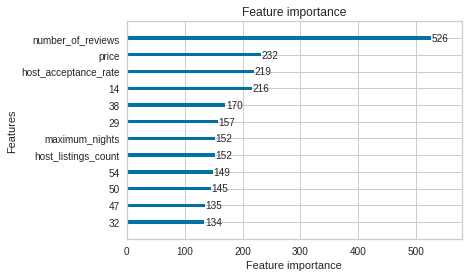

LGBM - results 
Precision: 0.67 
Recall: 0.64 
F1 Score: 0.65

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.69      0.62       644
           1       0.88      0.60      0.71       604
           2       0.58      0.63      0.61       620

    accuracy                           0.64      1868
   macro avg       0.68      0.64      0.65      1868
weighted avg       0.67      0.64      0.65      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        445         23        176
Class_1        135        360        109
Class_2        203         24        393
ROC Curve


<ipython-input-329-2dd0373765a5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


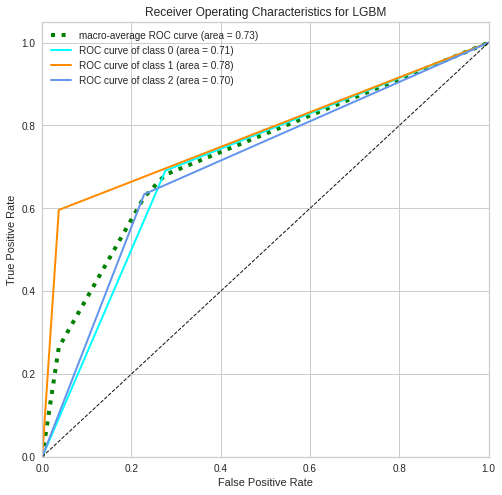

In [ ]:
report_lgbm(gbm, x_test, y_test)

In [ ]:
rnd_for = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=30, 
    min_samples_split=10, 
    class_weight="balanced"
    )

rnd_for.fit(x_train, y_train)
print('Feature importances from Random Forest')
imp = rnd_for.feature_importances_
feat = columns

Feature importances from Random Forest


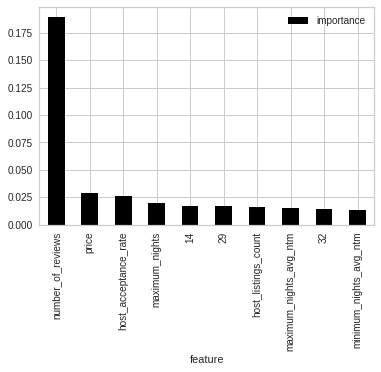

Logistic Regression -  results
Score: 0.629
Precision: 0.68 
Recall: 0.63 
F1 Score: 0.64

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.70      0.61       644
           1       0.95      0.57      0.72       604
           2       0.56      0.61      0.58       620

    accuracy                           0.63      1868
   macro avg       0.69      0.63      0.64      1868
weighted avg       0.68      0.63      0.64      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        451          7        186
Class_1        145        346        113
Class_2        232         10        378


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


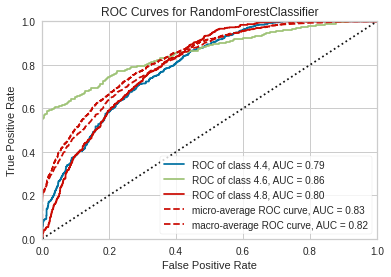

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca38b611f0>,
       encoder={0: '4.4', 1: '4.6', 2: '4.8'},
       estimator=RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_split=10,
                                        n_estimators=1000))

In [ ]:
tree_result = pd.DataFrame({'feature': feat, 'importance': imp})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',color='black')
plt.show()
report(rnd_for, x_test, y_test)
plot_ROC_curve(rnd_for, x_train, y_train, x_test, y_test)

CHECK-IN RATING

In [ ]:
bins = [4.4,4.6,4.8]
listing1 = listing.assign(
    rating_bins = pd.qcut(
        listing['review_scores_checkin'],
        q=3,
        duplicates='drop',
        labels=[0,1,2]
    )
)
print(listing1['rating_bins'].value_counts())

columns = ['host_acceptance_rate', 'host_is_superhost','host_listings_count','host_has_profile_pic',
           'host_identity_verified','accommodates','bedrooms','beds','price','minimum_nights','maximum_nights',
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','number_of_reviews',
           'instant_bookable', '0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
           '16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33',
           '34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51',
           '52','53','54','55','56','57','58','59','60','61','62','63','64','65']

target = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
          'review_scores_communication','review_scores_location','review_scores_value']

#For check-in

x = listing1.loc[:,columns]
y = listing1['rating_bins']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

0    2624
2    2478
1    2368
Name: rating_bins, dtype: int64


In [ ]:
grid_cv_lr(LogisticRegression(), paramgrid, x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 5, 10, 50],
                          'multi_class': ['multinomial'], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg']}],
             scoring='accuracy', verbose=True)
LogisticRegression(C=50, multi_class='multinomial', solver='newton-cg')
0.533917102077227


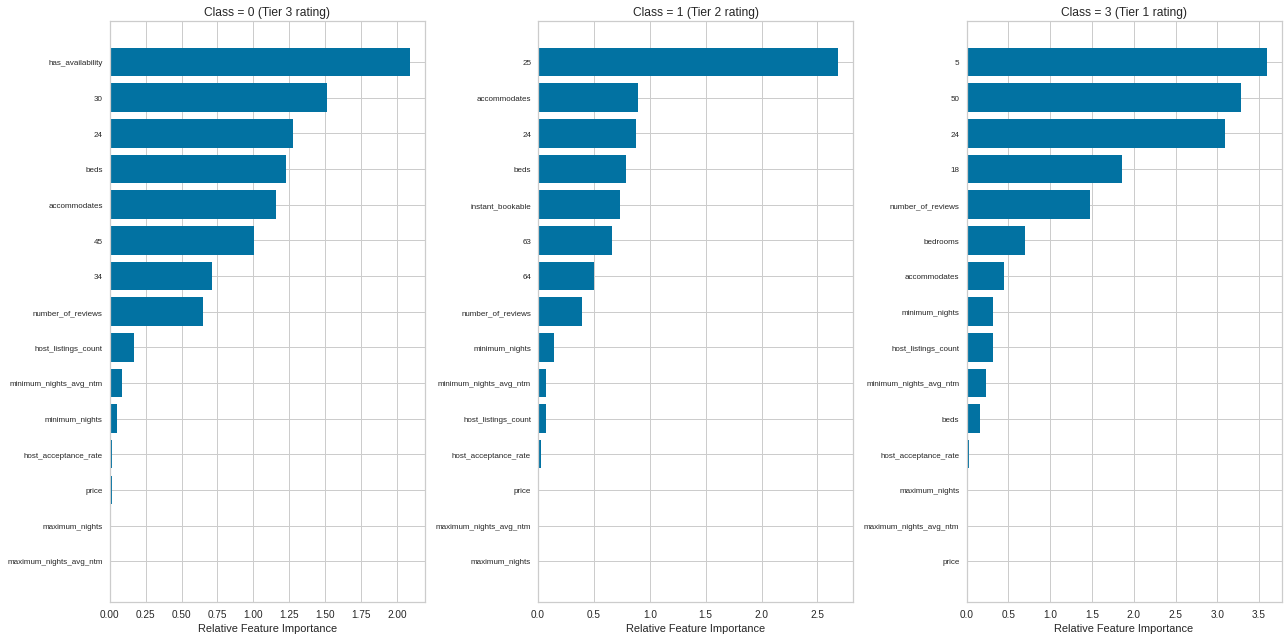

Score: 0.519
Precision: 0.52 
Recall: 0.52 
F1 Score: 0.52

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.52      0.54       646
           1       0.48      0.51      0.49       579
           2       0.51      0.53      0.52       643

    accuracy                           0.52      1868
   macro avg       0.52      0.52      0.52      1868
weighted avg       0.52      0.52      0.52      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        333        129        184
Class_1        142        295        142
Class_2        108        194        341


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


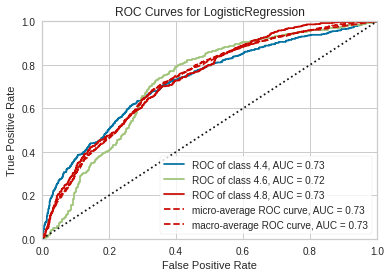

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca38105b80>,
       encoder={0: '4.4', 1: '4.6', 2: '4.8'},
       estimator=LogisticRegression(C=50, multi_class='multinomial',
                                    random_state=0, solver='newton-cg'))

In [ ]:
model = LogisticRegression(penalty = 'l2', C=50, random_state=0, solver='newton-cg',multi_class='multinomial')
model.fit(x_train, y_train)

plot_imp_fea(model)
report(model, x_test, y_test)
plot_ROC_curve(model, x_train, y_train, x_test, y_test)

In [ ]:
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':3,
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'max_depth': 7,
    'num_leaves': 17,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.6,
    'bagging_freq': 17
         }
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
evals_result = {}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=5,
               evals_result=evals_result,
               feature_name=columns)

[1]	valid_0's multi_logloss: 1.07611
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 1.06133
[3]	valid_0's multi_logloss: 1.04453
[4]	valid_0's multi_logloss: 1.03254
[5]	valid_0's multi_logloss: 1.01928
[6]	valid_0's multi_logloss: 1.00451
[7]	valid_0's multi_logloss: 0.987539
[8]	valid_0's multi_logloss: 0.978014
[9]	valid_0's multi_logloss: 0.968446
[10]	valid_0's multi_logloss: 0.958393
[11]	valid_0's multi_logloss: 0.944945
[12]	valid_0's multi_logloss: 0.935842
[13]	valid_0's multi_logloss: 0.92307
[14]	valid_0's multi_logloss: 0.911853
[15]	valid_0's multi_logloss: 0.903291
[16]	valid_0's multi_logloss: 0.896831
[17]	valid_0's multi_logloss: 0.890128
[18]	valid_0's multi_logloss: 0.877366
[19]	valid_0's multi_logloss: 0.865027
[20]	valid_0's multi_logloss: 0.856311
[21]	valid_0's multi_logloss: 0.851756
[22]	valid_0's multi_logloss: 0.843458
[23]	valid_0's multi_logloss: 0.838137
[24]	valid_0's multi_logloss: 0.832218
[25]	valid_0's mult


LGBM feature importances:


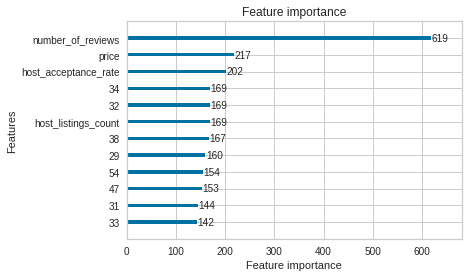

LGBM - results 
Precision: 0.71 
Recall: 0.70 
F1 Score: 0.70

Classification Report
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       646
           1       0.85      0.74      0.79       579
           2       0.68      0.72      0.70       643

    accuracy                           0.70      1868
   macro avg       0.71      0.70      0.70      1868
weighted avg       0.71      0.70      0.70      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        411         45        190
Class_1        117        428         34
Class_2        147         30        466
ROC Curve


<ipython-input-329-2dd0373765a5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


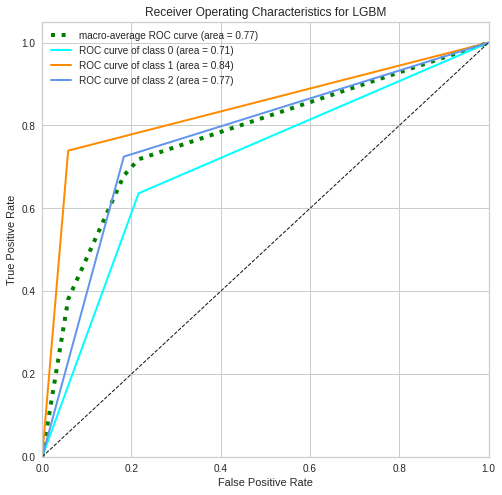

In [ ]:
report_lgbm(gbm, x_test, y_test)

Feature importances from Random Forest


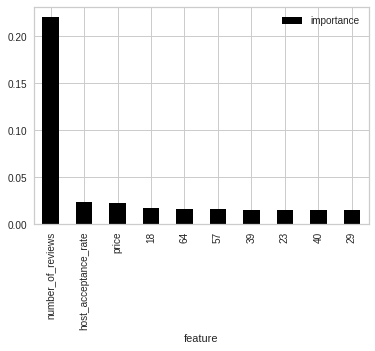

Score: 0.692
Precision: 0.71 
Recall: 0.69 
F1 Score: 0.70

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       646
           1       0.87      0.71      0.78       579
           2       0.68      0.72      0.70       643

    accuracy                           0.69      1868
   macro avg       0.71      0.69      0.70      1868
weighted avg       0.71      0.69      0.70      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        419         41        186
Class_1        135        412         32
Class_2        161         21        461


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


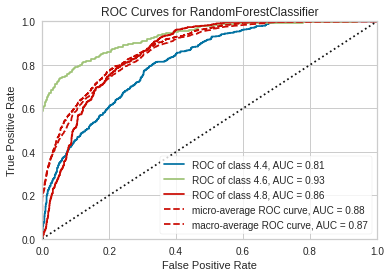

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca37e439a0>,
       encoder={0: '4.4', 1: '4.6', 2: '4.8'},
       estimator=RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_split=10,
                                        n_estimators=1000))

In [ ]:
rnd_for = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=30, 
    min_samples_split=10, 
    class_weight="balanced"
    )

rnd_for.fit(x_train, y_train)
print('Feature importances from Random Forest')
imp = rnd_for.feature_importances_
feat = columns

tree_result = pd.DataFrame({'feature': feat, 'importance': imp})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',color='black')
plt.show()
report(rnd_for, x_test, y_test)
plot_ROC_curve(rnd_for, x_train, y_train, x_test, y_test)

VALUE SCORE

In [ ]:
bins = [4.3,4.5,4.7]
listing1 = listing.assign(
    rating_bins = pd.qcut(
        listing['review_scores_value'],
        q=3,
        duplicates='drop',
        labels=[0,1,2]
    )
)
print(listing1['rating_bins'].value_counts())

columns = ['host_acceptance_rate', 'host_is_superhost','host_listings_count','host_has_profile_pic',
           'host_identity_verified','accommodates','bedrooms','beds','price','minimum_nights','maximum_nights',
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','number_of_reviews',
           'instant_bookable', '0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
           '16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33',
           '34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51',
           '52','53','54','55','56','57','58','59','60','61','62','63','64','65']

target = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
          'review_scores_communication','review_scores_location','review_scores_value']

#For Value

x = listing1.loc[:,columns]
y = listing1['rating_bins']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

0    2729
2    2485
1    2256
Name: rating_bins, dtype: int64


In [ ]:
grid_cv_lr(LogisticRegression(), paramgrid, x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 5, 10, 50],
                          'multi_class': ['multinomial'], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg']}],
             scoring='accuracy', verbose=True)
LogisticRegression(C=5, multi_class='multinomial', solver='newton-cg')
0.5371270867847585


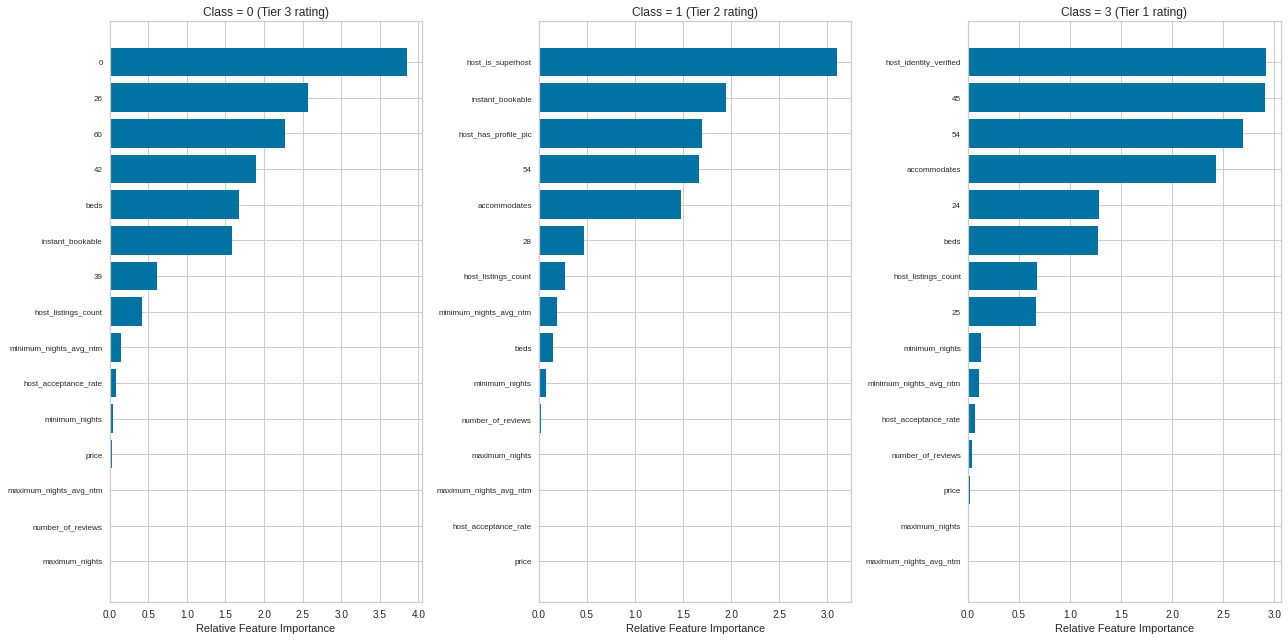

Score: 0.539
Precision: 0.54 
Recall: 0.54 
F1 Score: 0.54

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       688
           1       0.52      0.58      0.55       553
           2       0.54      0.47      0.50       627

    accuracy                           0.54      1868
   macro avg       0.54      0.54      0.54      1868
weighted avg       0.54      0.54      0.54      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        392        150        146
Class_1        124        319        110
Class_2        191        140        296


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


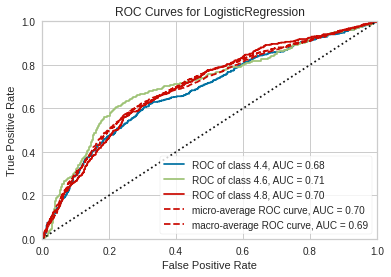

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca37fea190>,
       encoder={0: '4.4', 1: '4.6', 2: '4.8'},
       estimator=LogisticRegression(C=5, multi_class='multinomial',
                                    random_state=0, solver='newton-cg'))

In [ ]:
model = LogisticRegression(penalty = 'l2', C=5, random_state=0, solver='newton-cg',multi_class='multinomial')
model.fit(x_train, y_train)

plot_imp_fea(model)
report(model, x_test, y_test)
plot_ROC_curve(model, x_train, y_train, x_test, y_test)

In [ ]:
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':3,
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'max_depth': 7,
    'num_leaves': 17,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.6,
    'bagging_freq': 17
         }
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
evals_result = {}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=5,
               evals_result=evals_result,
               feature_name=columns)

[1]	valid_0's multi_logloss: 1.07978
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 1.07003
[3]	valid_0's multi_logloss: 1.05639
[4]	valid_0's multi_logloss: 1.04772
[5]	valid_0's multi_logloss: 1.03692
[6]	valid_0's multi_logloss: 1.0275
[7]	valid_0's multi_logloss: 1.01573
[8]	valid_0's multi_logloss: 1.00784
[9]	valid_0's multi_logloss: 1.00025
[10]	valid_0's multi_logloss: 0.992294
[11]	valid_0's multi_logloss: 0.982954
[12]	valid_0's multi_logloss: 0.975739
[13]	valid_0's multi_logloss: 0.966359
[14]	valid_0's multi_logloss: 0.958345
[15]	valid_0's multi_logloss: 0.95211
[16]	valid_0's multi_logloss: 0.946284
[17]	valid_0's multi_logloss: 0.941105
[18]	valid_0's multi_logloss: 0.930134
[19]	valid_0's multi_logloss: 0.920849
[20]	valid_0's multi_logloss: 0.914309
[21]	valid_0's multi_logloss: 0.910958
[22]	valid_0's multi_logloss: 0.904233
[23]	valid_0's multi_logloss: 0.899323
[24]	valid_0's multi_logloss: 0.893613
[25]	valid_0's multi_lo


LGBM feature importances:


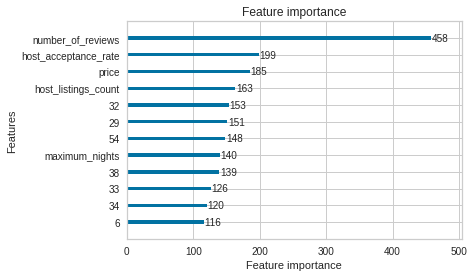

LGBM - results 
Precision: 0.67 
Recall: 0.63 
F1 Score: 0.64

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       688
           1       0.93      0.62      0.74       553
           2       0.53      0.62      0.57       627

    accuracy                           0.63      1868
   macro avg       0.68      0.63      0.65      1868
weighted avg       0.67      0.63      0.64      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        452          8        228
Class_1        100        341        112
Class_2        218         19        390
ROC Curve


<ipython-input-329-2dd0373765a5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


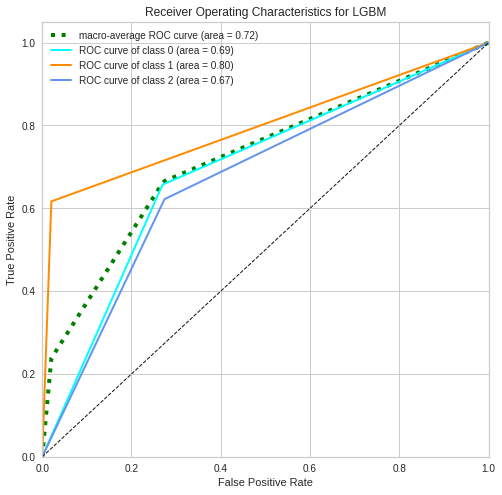

In [ ]:
report_lgbm(gbm, x_test, y_test)

Feature importances from Random Forest


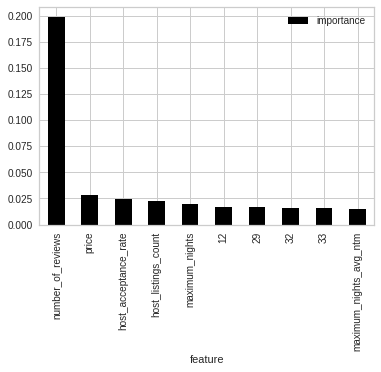

Score: 0.640
Precision: 0.69 
Recall: 0.64 
F1 Score: 0.65

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       688
           1       0.99      0.61      0.75       553
           2       0.54      0.65      0.59       627

    accuracy                           0.64      1868
   macro avg       0.70      0.64      0.65      1868
weighted avg       0.69      0.64      0.65      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        454          2        232
Class_1         97        336        120
Class_2        219          3        405


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


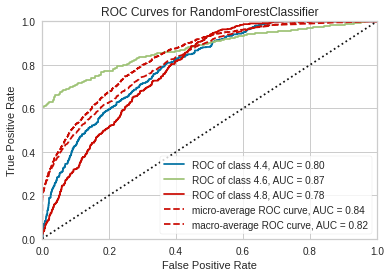

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca385a5dc0>,
       encoder={0: '4.4', 1: '4.6', 2: '4.8'},
       estimator=RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_split=10,
                                        n_estimators=1000))

In [ ]:
rnd_for = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=30, 
    min_samples_split=10, 
    class_weight="balanced"
    )

rnd_for.fit(x_train, y_train)
print('Feature importances from Random Forest')
imp = rnd_for.feature_importances_
feat = columns

tree_result = pd.DataFrame({'feature': feat, 'importance': imp})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',color='black')
plt.show()
report(rnd_for, x_test, y_test)
plot_ROC_curve(rnd_for, x_train, y_train, x_test, y_test)

Location

In [ ]:
bins = [4.4,4.6,4.8]
listing1 = listing.assign(
    rating_bins = pd.qcut(
        listing['review_scores_location'],
        q=3,
        duplicates='drop',
        labels=[0,1,2]
    )
)
print(listing1['rating_bins'].value_counts())

columns = ['host_acceptance_rate', 'host_is_superhost','host_listings_count','host_has_profile_pic',
           'host_identity_verified','accommodates','bedrooms','beds','price','minimum_nights','maximum_nights',
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','number_of_reviews',
           'instant_bookable', '0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
           '16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33',
           '34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51',
           '52','53','54','55','56','57','58','59','60','61','62','63','64','65']

target = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
          'review_scores_communication','review_scores_location','review_scores_value']

#For Location

x = listing1.loc[:,columns]
y = listing1['rating_bins']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

1    2587
0    2497
2    2386
Name: rating_bins, dtype: int64


In [ ]:
grid_cv_lr(LogisticRegression(), paramgrid, x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 5, 10, 50],
                          'multi_class': ['multinomial'], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg']}],
             scoring='accuracy', verbose=True)
LogisticRegression(C=50, multi_class='multinomial', solver='newton-cg')
0.49339110488084625


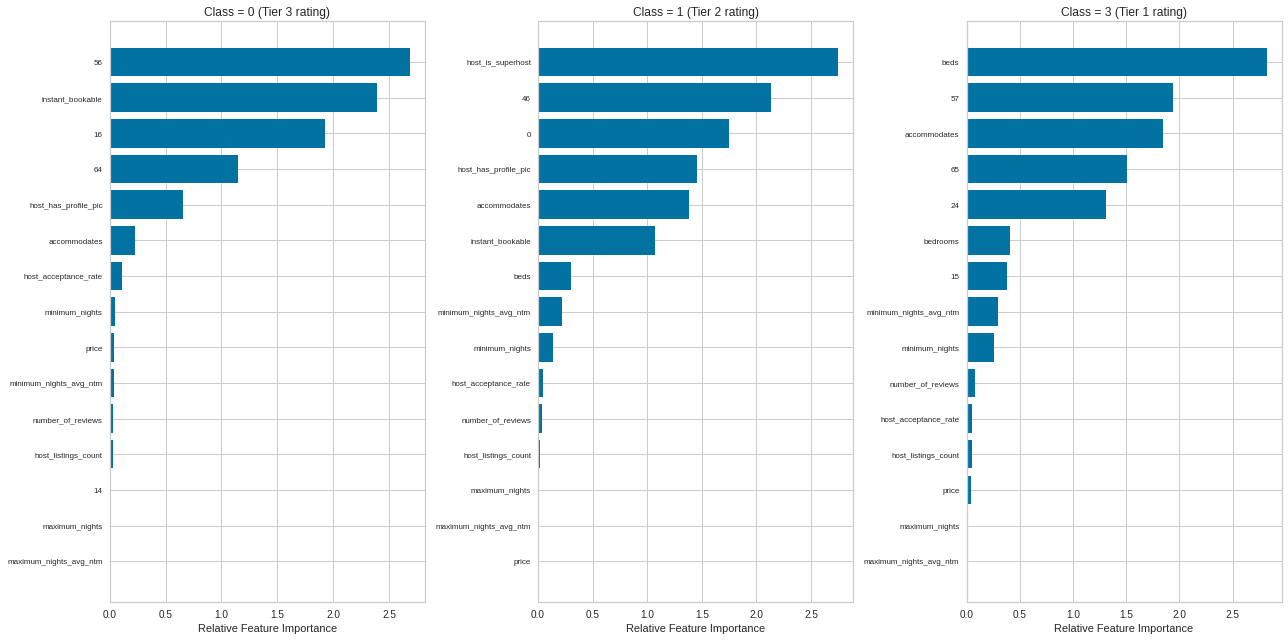

Score: 0.493
Precision: 0.49 
Recall: 0.49 
F1 Score: 0.49

Classification Report
              precision    recall  f1-score   support

           0       0.49      0.52      0.51       610
           1       0.51      0.58      0.54       649
           2       0.47      0.37      0.41       609

    accuracy                           0.49      1868
   macro avg       0.49      0.49      0.49      1868
weighted avg       0.49      0.49      0.49      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        319        161        130
Class_1        150        377        122
Class_2        178        207        224


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


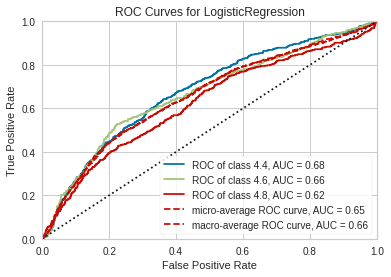

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca3829c5e0>,
       encoder={0: '4.4', 1: '4.6', 2: '4.8'},
       estimator=LogisticRegression(C=50, multi_class='multinomial',
                                    random_state=0, solver='newton-cg'))

In [ ]:
model = LogisticRegression(penalty = 'l2', C=50, random_state=0, solver='newton-cg',multi_class='multinomial')
model.fit(x_train, y_train)

plot_imp_fea(model)
report(model, x_test, y_test)
plot_ROC_curve(model, x_train, y_train, x_test, y_test)

In [ ]:
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':3,
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'max_depth': 7,
    'num_leaves': 17,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.6,
    'bagging_freq': 17
         }
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
evals_result = {}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=5,
               evals_result=evals_result,
               feature_name=columns)

[1]	valid_0's multi_logloss: 1.08389
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 1.0745
[3]	valid_0's multi_logloss: 1.06247
[4]	valid_0's multi_logloss: 1.05451
[5]	valid_0's multi_logloss: 1.04503
[6]	valid_0's multi_logloss: 1.03599
[7]	valid_0's multi_logloss: 1.02451
[8]	valid_0's multi_logloss: 1.01769
[9]	valid_0's multi_logloss: 1.01029
[10]	valid_0's multi_logloss: 1.00378
[11]	valid_0's multi_logloss: 0.994341
[12]	valid_0's multi_logloss: 0.988255
[13]	valid_0's multi_logloss: 0.979396
[14]	valid_0's multi_logloss: 0.971842
[15]	valid_0's multi_logloss: 0.966066
[16]	valid_0's multi_logloss: 0.960705
[17]	valid_0's multi_logloss: 0.955525
[18]	valid_0's multi_logloss: 0.946612
[19]	valid_0's multi_logloss: 0.936857
[20]	valid_0's multi_logloss: 0.930807
[21]	valid_0's multi_logloss: 0.927873
[22]	valid_0's multi_logloss: 0.921854
[23]	valid_0's multi_logloss: 0.917923
[24]	valid_0's multi_logloss: 0.914019
[25]	valid_0's multi_lo


LGBM feature importances:


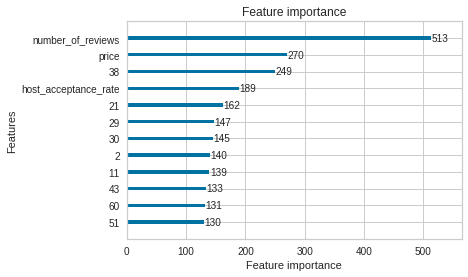

LGBM - results 
Precision: 0.67 
Recall: 0.64 
F1 Score: 0.65

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.68      0.61       610
           1       0.84      0.59      0.69       649
           2       0.60      0.65      0.62       609

    accuracy                           0.64      1868
   macro avg       0.66      0.64      0.64      1868
weighted avg       0.67      0.64      0.65      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        416         31        163
Class_1        161        384        104
Class_2        167         44        398
ROC Curve


<ipython-input-329-2dd0373765a5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


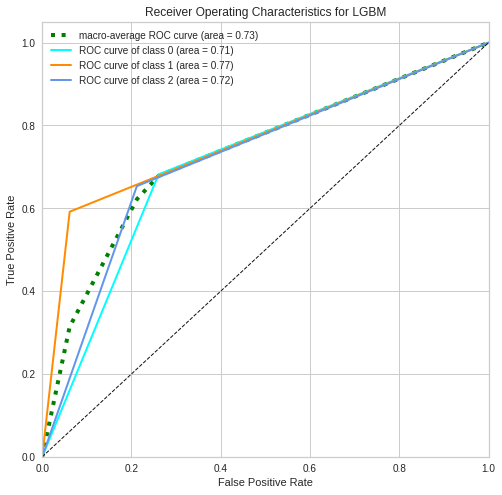

In [ ]:
report_lgbm(gbm, x_test, y_test)

Feature importances from Random Forest


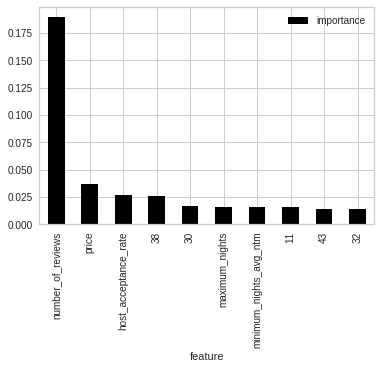

Score: 0.634
Precision: 0.69 
Recall: 0.63 
F1 Score: 0.64

Classification Report
              precision    recall  f1-score   support

           0       0.53      0.70      0.60       610
           1       0.95      0.54      0.69       649
           2       0.59      0.67      0.63       609

    accuracy                           0.63      1868
   macro avg       0.69      0.64      0.64      1868
weighted avg       0.69      0.63      0.64      1868


Confusion Matrix
         P_Class_0  P_Class_1  P_Class_2
Class_0        425          7        178
Class_1        187        350        112
Class_2        188         12        409


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


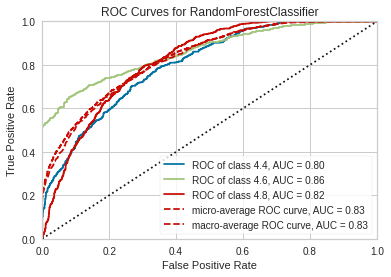

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca37b01c70>,
       encoder={0: '4.4', 1: '4.6', 2: '4.8'},
       estimator=RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_split=10,
                                        n_estimators=1000))

In [ ]:
rnd_for = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=30, 
    min_samples_split=10, 
    class_weight="balanced"
    )

rnd_for.fit(x_train, y_train)
print('Feature importances from Random Forest')
imp = rnd_for.feature_importances_
feat = columns

tree_result = pd.DataFrame({'feature': feat, 'importance': imp})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',color='black')
plt.show()
report(rnd_for, x_test, y_test)
plot_ROC_curve(rnd_for, x_train, y_train, x_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_svc(x_train, y_train ):
    # defining parameter range
    param_grid = {'C': [0.1, 1, 10, 100, 1000],
		            	'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			            'kernel': ['rbf']}

    cl = GridSearchCV(SVC(), param_grid = param_grid, refit = True, verbose = 3)
    best_clf = cl.fit(x_train,y_train)
    print(best_clf.best_estimator_)
    print(best_clf.best_score_)

In [ ]:
grid_svc(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.340 total time=   2.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.339 total time=   2.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.339 total time=   2.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.339 total time=   2.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.340 total time=   2.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.341 total time=   2.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.340 total time=   2.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.341 total time=   2.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.339 total time=   2.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.339 total time=   2.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.353 total time=   2.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf